In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from scipy.io import loadmat                    # To load .mat files
from pylab import *                             # Import plotting functions
from IPython.lib.display import YouTubeVideo    # Package for displaying YouTube videos

In [3]:
# ... and the tools that we will need for this notebook
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
rcParams['figure.figsize']=(12,3)               # Change the default figure size

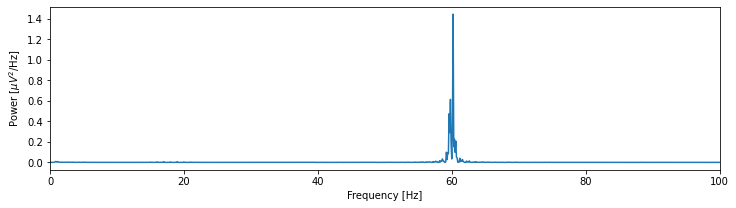

In [4]:
data = loadmat('/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/EEG-1.mat')  # Load the EEG data
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

# Introduction

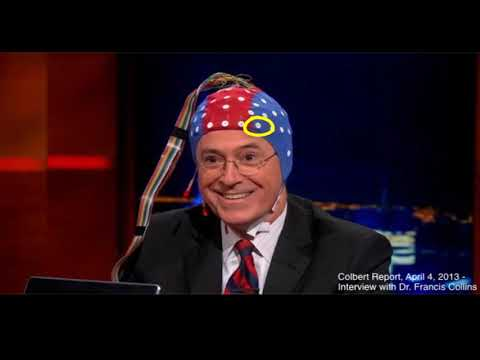

In [5]:
YouTubeVideo('PmGme7YuAiw') # https://youtu.be/PmGme7YuAiw

# Case Study Data

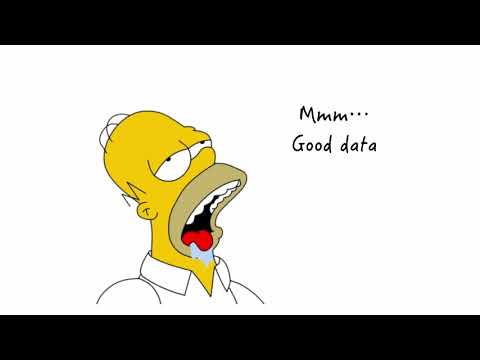

In [6]:
YouTubeVideo('oRCUx11iEck') # https://youtu.be/oRCUx11iEck

# Goals

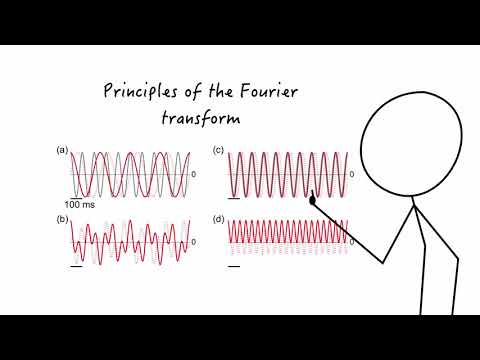

In [7]:
YouTubeVideo('L0xf0dCn7T0') # https://youtu.be/L0xf0dCn7T0

#Data analysis
We will go through the following steps to analyze the data:

1. Visual inspection
2. Mean, variance, and standard deviation
3. The autocovariance
4. Power spectral density
5. Decibel scaling
6. The spectrogram


## Step 1: Visual Inspection

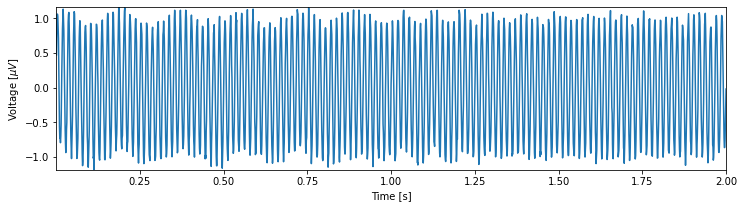

In [8]:


data = loadmat('/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/03_EEG-1.mat') # Load the EEG data
EEG = data['EEG'][:, 0]                 # Extract the EEG variable
t = data['t'][0]                        # ... and the t variable

plot(t, EEG)                            # Plot the data versus time
xlabel('Time [s]')                      # Label the time axis
ylabel('Voltage [$\mu V$]')             # ... and the voltage axis
autoscale(tight=True)                   # Minimize white space
show()

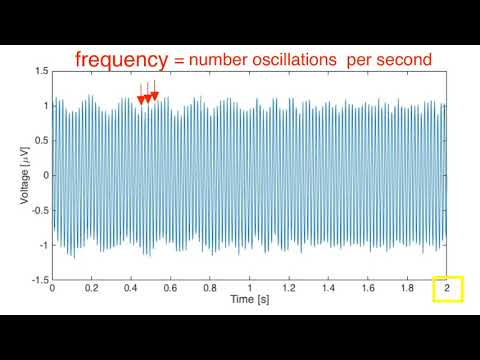

In [9]:
YouTubeVideo('GepHsNVXTN4') # https://youtu.be/GepHsNVXTN4

In [ ]:
# Visual inspection reveals about 12 peaks in 0.2 sec this means that the signal oscillates at 60Hz. Gamma band (40 - 80 Hz).
# This data might be contaminated with noise because AC current oscillates at 60 Hz in North America. 
# We can do 3 things now:
  # 1) Reduce noise in clinical recording procedure (Too expensive).
  # 2) Abandon project (We don't just want to abandon project).
  # 3) More analysis...

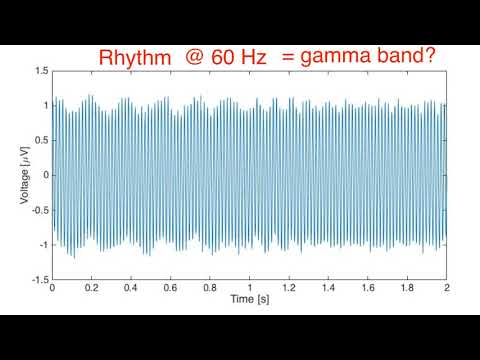

In [10]:
YouTubeVideo('mZ1uHN4lcPY') # https://youtu.be/mZ1uHN4lcPY

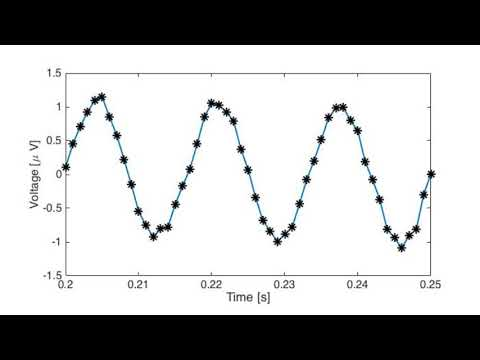

In [11]:
YouTubeVideo('UVnpQVUqpWI') # https://youtu.be/UVnpQVUqpWI

# The data is recorded in discreet intervals of time. It looks like its continuous, but it isnt. So we should plot it. 

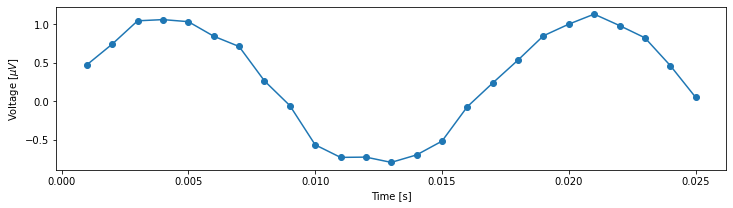

In [12]:
plot(t[:25], EEG[:25], 'o-')    # Plot the first 25 points of data,
xlabel('Time [s]')              # ... with axes labeled.
ylabel('Voltage [$\mu V$]')
show()

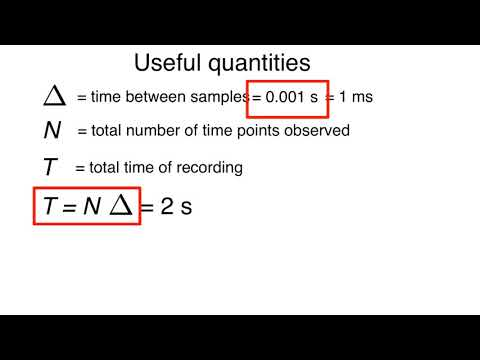

In [13]:
YouTubeVideo('W9BTYZM8yzs') # https://youtu.be/W9BTYZM8yzs



In [14]:
x = EEG           # Relabel the data variable
dt = t[1] - t[0]  # Define the sampling interval
N = x.shape[0]    # Define the total number of data points
T = N * dt        # Define the total duration of the data

## Step 2: Mean, variance, and standard deviation¶

In [15]:
mn = x.mean()  # Compute the mean of the data
vr = x.var()   # Compute the variance of the data
sd = x.std()   # Compute the standard deviation of the data

print('mn = ' + str(mn))
print('vr = ' + str(vr))
print('sd = ' + str(sd))

mn = 2.731148640577885e-17
vr = 0.5047172407856452
sd = 0.7104345436320261


## Step 3: The autocovariance

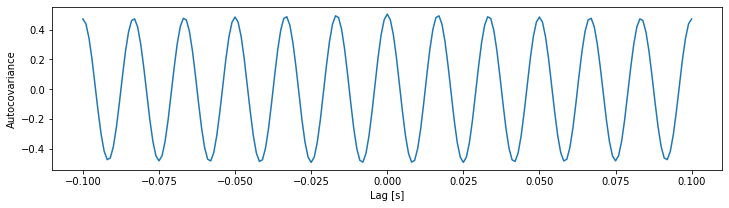

In [16]:
lags = arange(-len(x) + 1, len(x))    # Compute the lags for the full autocovariance vector
                                      # ... and the autocov for L +/- 100 indices
ac = 1 / N * correlate(x - x.mean(), x - x.mean(), mode='full')
inds = abs(lags) <= 100               # Find the lags that are within 100 time steps
plot(lags[inds] * dt, ac[inds])       # ... and plot them
xlabel('Lag [s]')                     # ... with axes labelled
ylabel('Autocovariance')
show()

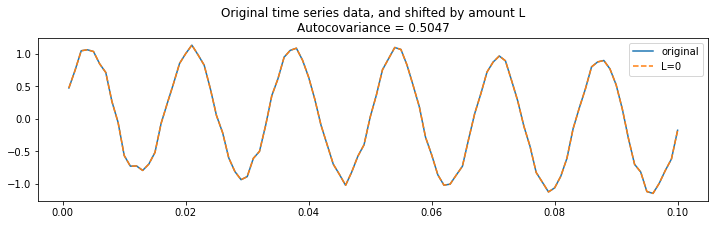

In [17]:
inds = range(100)          # Choose a subset of the data to plot
plot(t[inds], x[inds], label="original");   # Plot the original
L=0;                       # Choose the lag,
                           # ... and plot the shifted traces.
plot(t[inds], x[[i + L for i in inds]], '--',
     label="L={}".format(L))
legend(loc='upper right')  # Add a legend and informative title
title("Original time series data, and shifted by amount L\nAutocovariance = {:.4}".format(ac[lags==L][0]));

In [18]:
ac[lags == 0]

array([0.50471724])

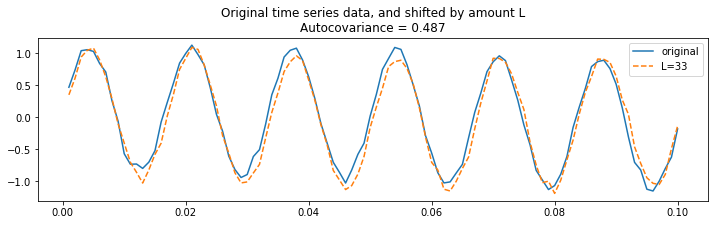

In [19]:
plot(t[inds], x[inds], label="original");       # Plot the original
L=int(2*1/60/dt);                               # Choose the lag,
                                                # ... and plot the shifted traces.
plot(t[inds], x[[i + L for i in inds]], '--', 
     label="L={}".format(L))
legend()                                        # Add a legend and informative title
title("Original time series data, and shifted by amount L\nAutocovariance = {:.4}".format(ac[lags==L][0]));

In [20]:
ac[where(lags == L)]

array([0.48702814])

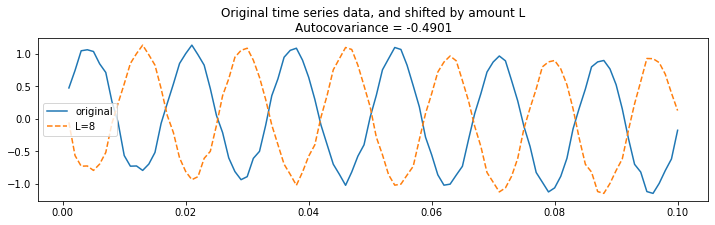

In [21]:
plot(t[inds], x[inds], label="original");       # Plot the original
L=int(1/2*1/60/dt);                             # Choose the lag,
                                                # ... and plot the shifted traces.
plot(t[inds], x[[i + L for i in inds]], '--', 
     label="L={}".format(L))
legend()                                        # Add a legend and informative title
title("Original time series data, and shifted by amount L\nAutocovariance = {:.4}".format(ac[lags==L][0]));

In [22]:
ac[lags == 8]


array([-0.49007471])

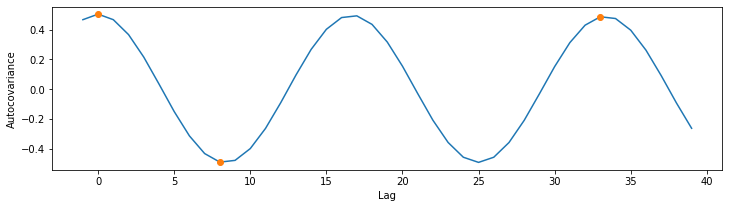

In [23]:
# Plot the autocovariance again, highlighting lags at 3 different shifts in the 60 Hz cycle
inds = [l in range(-1, 40) for l in lags]        # Get the lags in a limited range
plot(lags[inds], ac[inds])                       # ... and plot the autocovariance,
L = [0, 33, 8]                                   # Consider three specific lags
plot(sorted(L), ac[[l in L for l in lags]], 'o') # ... and highlight them
xlabel('Lag')                                    # Label the axes.
ylabel('Autocovariance');

# Step 4: Power spectral density, or spectrum

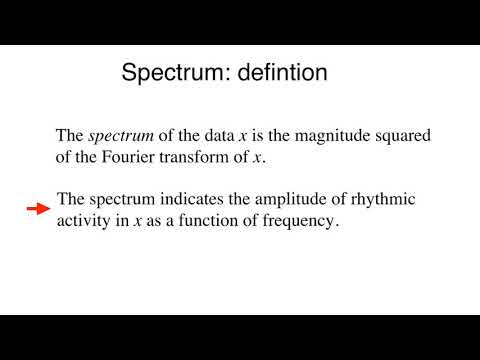

In [24]:
YouTubeVideo('OAHpkZy6ZX8') # https://youtu.be/OAHpkZy6ZX8

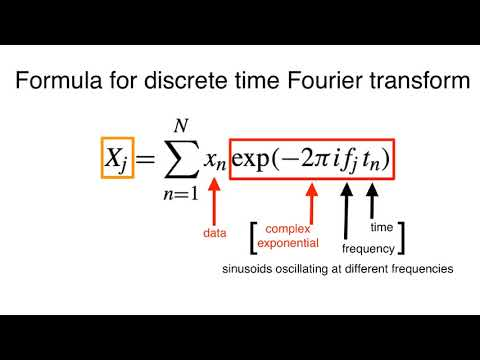

In [25]:
YouTubeVideo('iPUpMS79xgo') # https://youtu.be/iPUpMS79xgo


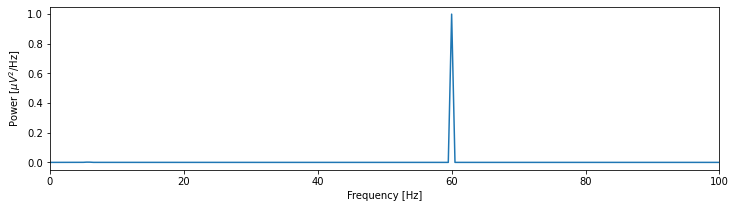

In [26]:
xf = fft(x - x.mean())                  # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * conj(xf)) # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]             # Ignore negative frequencies

df = 1 / T.max()                        # Determine frequency resolution
fNQ = 1 / dt / 2                        # Determine Nyquist frequency
faxis = arange(0,fNQ,df)                # Construct frequency axis

plot(faxis, real(Sxx))                  # Plot spectrum vs frequency
xlim([0, 100])                          # Select frequency range
xlabel('Frequency [Hz]')                # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

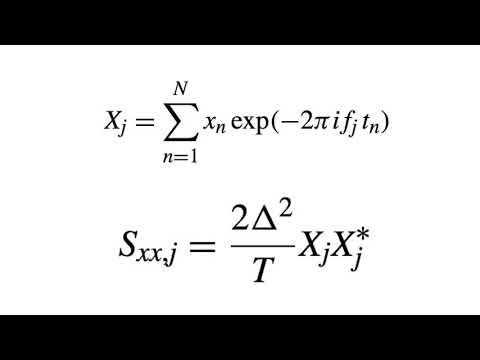

In [27]:
YouTubeVideo('kmHCCzAbMVI') # https://youtu.be/kmHCCzAbMVI

## Discrete Fourier Transform in Python

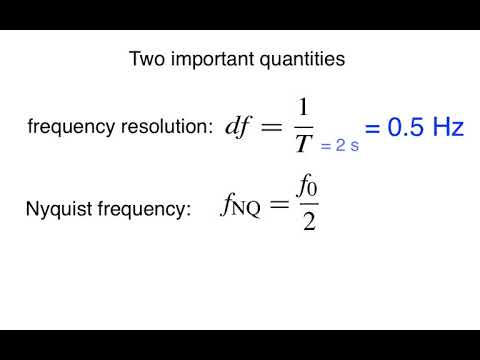

In [28]:
YouTubeVideo('noCOC69jvh8') # https://youtu.be/noCOC69jvh8

In [29]:
x = EEG
xf = rfft(x - x.mean()).real

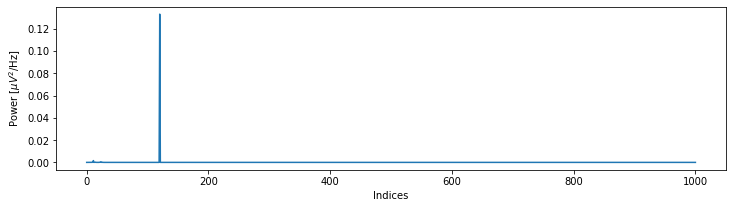

In [30]:
Sxx = 2 * dt ** 2 / T * xf * xf.conj()
plot(Sxx)
xlabel('Indices')
ylabel('Power [$\mu V^2$/Hz]');

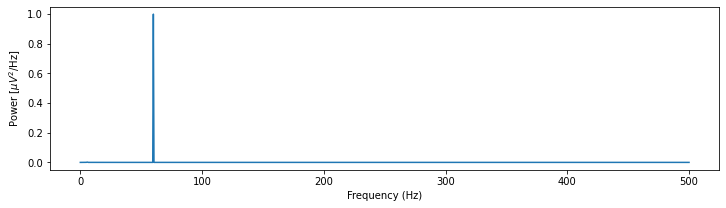

In [31]:
# Convert the indices to frequency
xf = rfft(x - x.mean())
Sxx = (2 * dt ** 2 / T * ( xf * xf.conj() ) ).real
df = 1 / T
fNQ = 1 / dt / 2
faxis = arange(len(Sxx)) * df
plot(faxis, Sxx)
xlabel('Frequency (Hz)')
ylabel('Power [$\mu V^2$/Hz]')
show()

## The Nyquist frequency

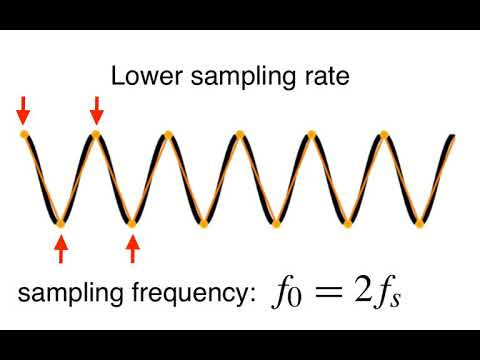

In [32]:
YouTubeVideo('sgYkOkrlQ_E') # https://youtu.be/sgYkOkrlQ_E

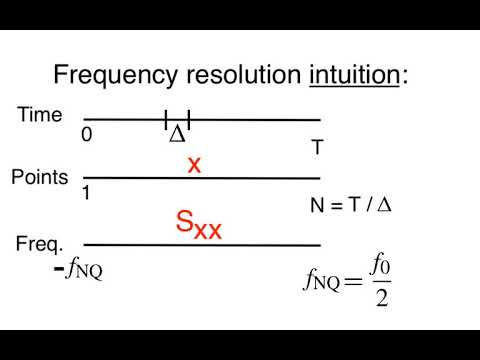

In [33]:
YouTubeVideo('bZsj_gcGoSo') # https://youtu.be/bZsj_gcGoSo

## Step 5: Decibel scaling

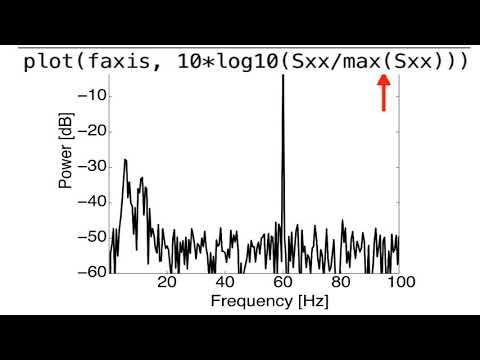

In [34]:
YouTubeVideo('SuDJha5LNL0') # https://youtu.be/SuDJha5LNL0

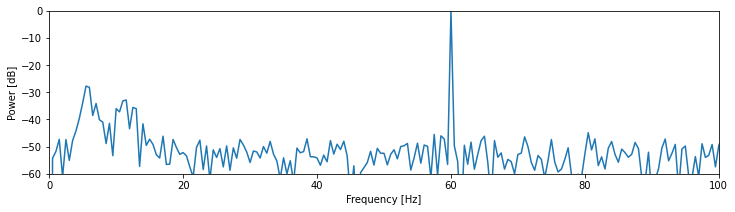

In [35]:
plot(faxis, 10 * log10(Sxx / max(Sxx)))  # Plot the spectrum in decibels.
xlim([0, 100])                           # Select the frequency range.
ylim([-60, 0])                           # Select the decibel range.
xlabel('Frequency [Hz]')                 # Label the axes.
ylabel('Power [dB]')
show()

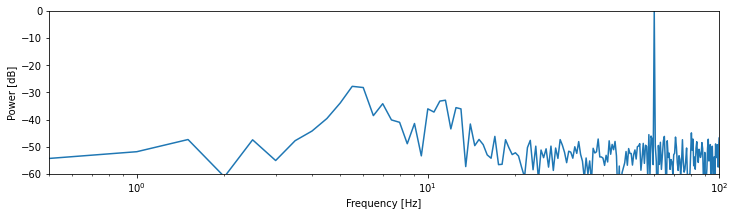

In [36]:
# Logarithmic Scale
semilogx(faxis, 10 * log10(Sxx / max(Sxx)))  # Log-log scale
xlim([df, 100])                              # Select frequency range
ylim([-60, 0])                               # ... and the decibel range.
xlabel('Frequency [Hz]')                     # Label the axes.
ylabel('Power [dB]')
show()

## Step 6: The spectrogram

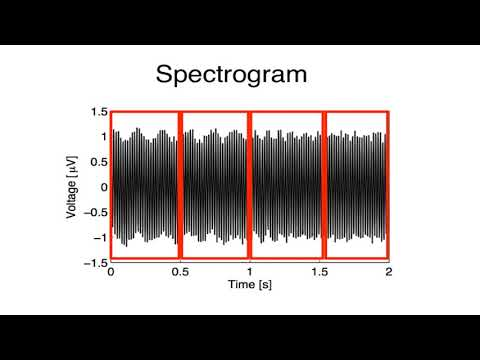

In [37]:
YouTubeVideo('XYy4NEr3VUs') # https://youtu.be/XYy4NEr3VUs

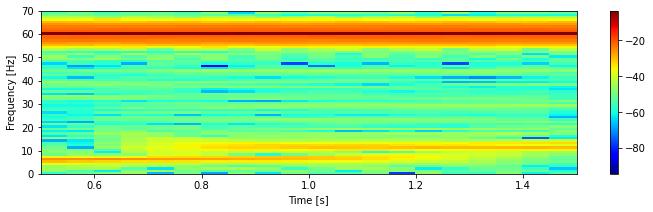

In [38]:
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 70])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
show()